In [1]:
# 导入所需库
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics



In [2]:
# 导入数据
data_file = 'adult.csv'
df = pd.read_csv(data_file)
print('====================数据已成功导入====================')
print('文件名称：{}'.format(data_file))
print('数据大小:',df.shape[0],'条')
print('表格列头:',df.shape[1],'列')
df.head()

====================数据已成功导入====================
文件名称：adult.csv
数据大小: 32561 条
表格列头: 15 列


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


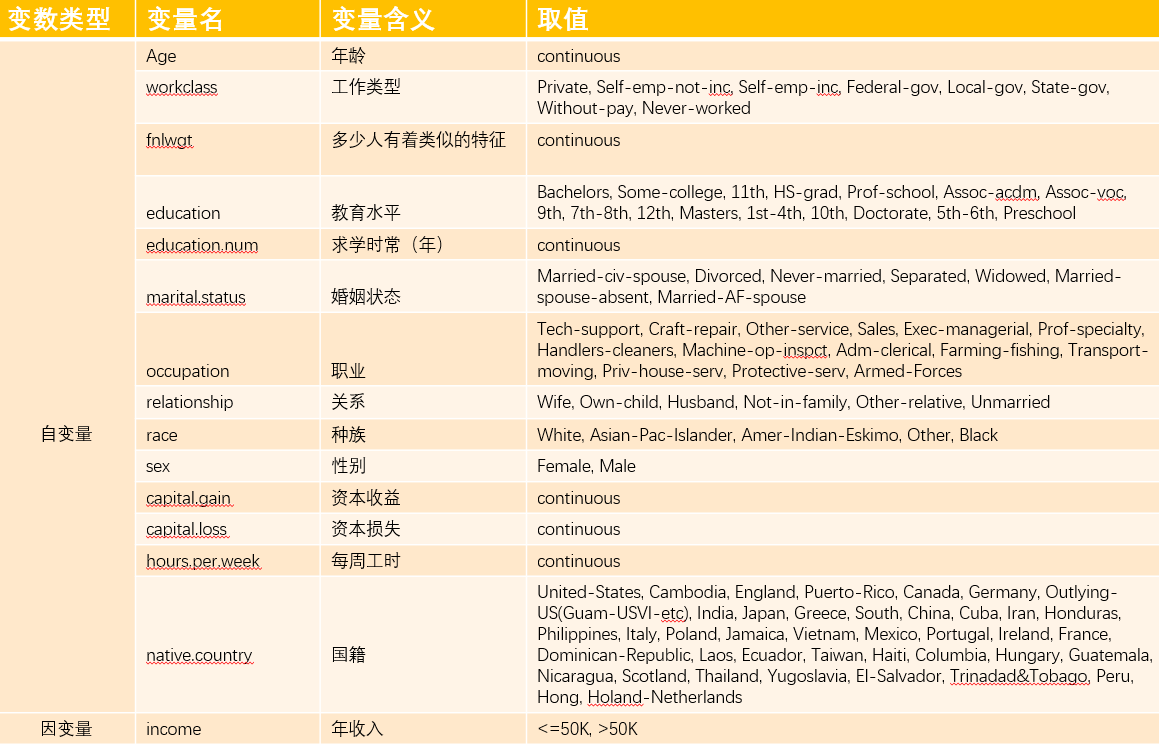

(array([  295.,   648.,   761.,  2239.,  1307.,  1999., 16137.,  2713.,
         3827.,  1545.,   301.,   365.,   216.,    64.,    38.,   106.]),
 array([ 1.   ,  7.125, 13.25 , 19.375, 25.5  , 31.625, 37.75 , 43.875,
        50.   , 56.125, 62.25 , 68.375, 74.5  , 80.625, 86.75 , 92.875,
        99.   ]),
 <BarContainer object of 16 artists>)

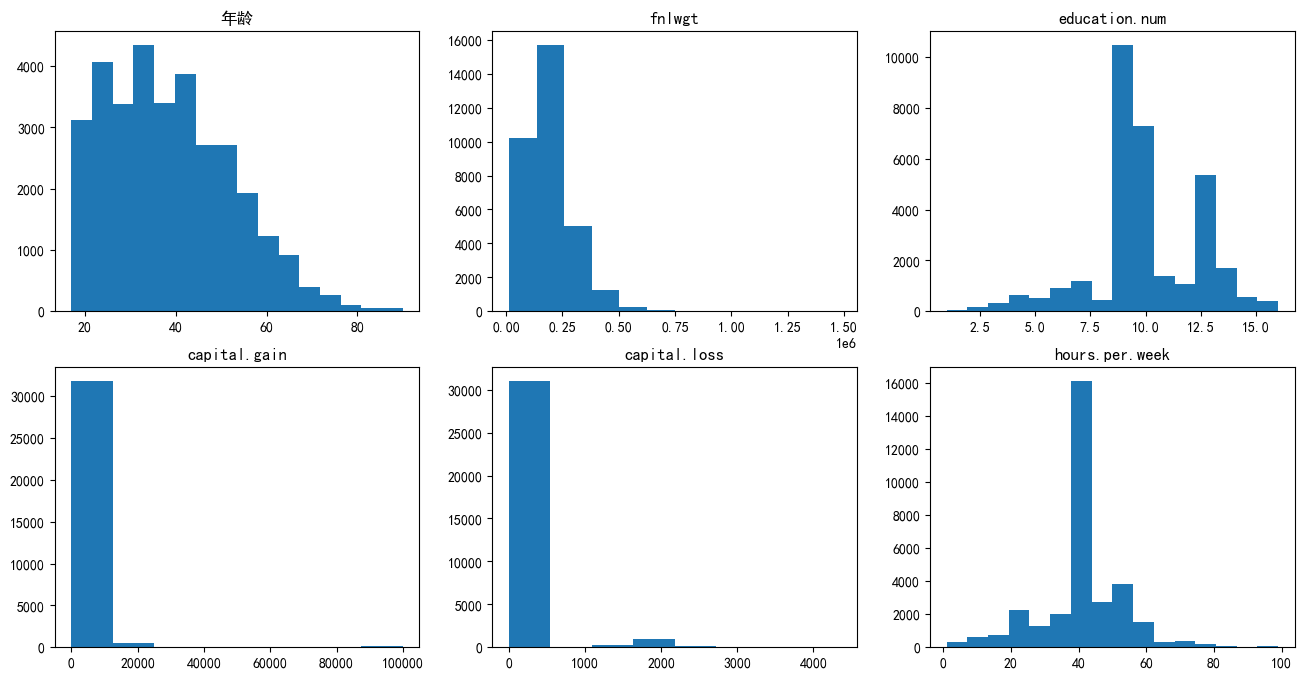

In [3]:
# 连续变数直方图分布概览
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(231)
ax1.set(title='年龄')
ax1.hist(df['age'], bins=16)
ax2 = fig.add_subplot(232)
ax2.set(title='fnlwgt')
ax2.hist(df['fnlwgt'], bins=12)
ax3 = fig.add_subplot(233)
ax3.set(title='education.num')
ax3.hist(df['education.num'], bins=16)
ax4 = fig.add_subplot(234)
ax4.set(title='capital.gain')
ax4.hist(df['capital.gain'], bins=8)
ax5 = fig.add_subplot(235)
ax5.set(title='capital.loss')
ax5.hist(df['capital.loss'], bins=8)
ax6 = fig.add_subplot(236)
ax6.set(title='hours.per.week')
ax6.hist(df['hours.per.week'], bins=16)

我们发现capital.gain及capital.loss两个变数的直方图出现极端的右尾,其原因是大部分的取值为0,在筛选非零值后取log再次作图发现大致呈现钟形分布  
non-zero count of capital.gain: 2712 / 32561,  
non-zero count of capital.loss: 1519 / 32561,  

non-zero count of capital.gain: 2712 / 32561


(array([  6.,   0.,   0.,   0.,   2.,   0.,  34.,  13.,  41.,  34., 135.,
        185., 314., 370., 145., 637.,  87.,  96., 360.,  53.,  34.,   7.,
          0.,   0., 159.]),
 array([ 4.73619845,  5.00726713,  5.27833581,  5.54940449,  5.82047317,
         6.09154185,  6.36261053,  6.63367921,  6.90474789,  7.17581657,
         7.44688526,  7.71795394,  7.98902262,  8.2600913 ,  8.53115998,
         8.80222866,  9.07329734,  9.34436602,  9.6154347 ,  9.88650338,
        10.15757206, 10.42864074, 10.69970942, 10.9707781 , 11.24184678,
        11.51291546]),
 <BarContainer object of 25 artists>)

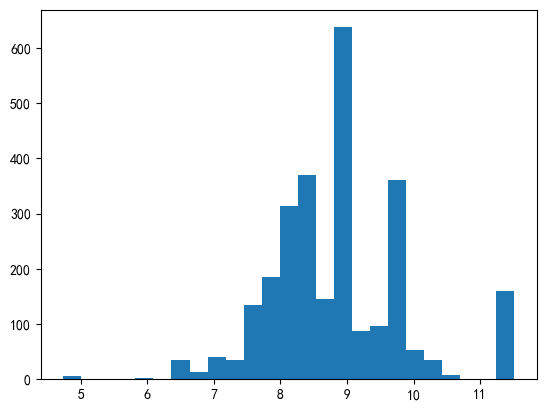

In [37]:
y = df['capital.gain']
y = [numb for numb in y if numb != 0]
print("non-zero count of capital.gain:",  len(y), "/", len(df['capital.gain']))
plt.hist(np.log(y), bins=25)

non-zero count of capital.loss: 1519 / 32561


(array([  1.,   0.,   4.,   0.,   0.,   3.,   0.,   3.,   0.,   0.,  15.,
          0.,   2.,   8.,   9.,   4.,  87., 262., 587., 338., 156.,  29.,
          2.,   4.,   5.]),
 array([5.04342512, 5.17686049, 5.31029587, 5.44373124, 5.57716662,
        5.71060199, 5.84403737, 5.97747274, 6.11090811, 6.24434349,
        6.37777886, 6.51121424, 6.64464961, 6.77808499, 6.91152036,
        7.04495574, 7.17839111, 7.31182649, 7.44526186, 7.57869724,
        7.71213261, 7.84556799, 7.97900336, 8.11243873, 8.24587411,
        8.37930948]),
 <BarContainer object of 25 artists>)

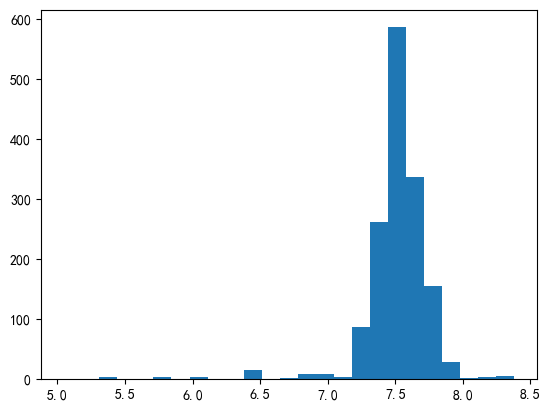

In [38]:
z = df['capital.loss']
z = [numb for numb in z if numb != 0]
print("non-zero count of capital.loss:",  len(z), "/", len(df['capital.loss']))
plt.hist(np.log(z), bins=25)

In [4]:
# 各类别变数分布情况
print('====================workclass分布情况====================')
print(df.workclass.value_counts(dropna=False))
print('')
print('====================education分布情况====================')
print(df.education.value_counts(dropna=False))
print('')
print('====================marital-status分布情况====================')
print(df['marital.status'].value_counts(dropna=False))
print('')
print('====================occupation分布情况====================')
print(df.occupation.value_counts(dropna=False))
print('')
print('====================relationship分布情况====================')
print(df.relationship.value_counts(dropna=False))
print('')
print('====================race分布情况====================')
print(df.race.value_counts(dropna=False))
print('')
print('====================sex分布情况====================')
print(df.sex.value_counts(dropna=False))
print('')
print('====================native-country分布情况====================')
print(df['native.country'].value_counts(dropna=False))
print('')
print('====================income分布情况====================')
print(df.income.value_counts(dropna=False))

====================workclass分布情况====================
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

====================education分布情况====================
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

====================marital-status分布情况====================
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418

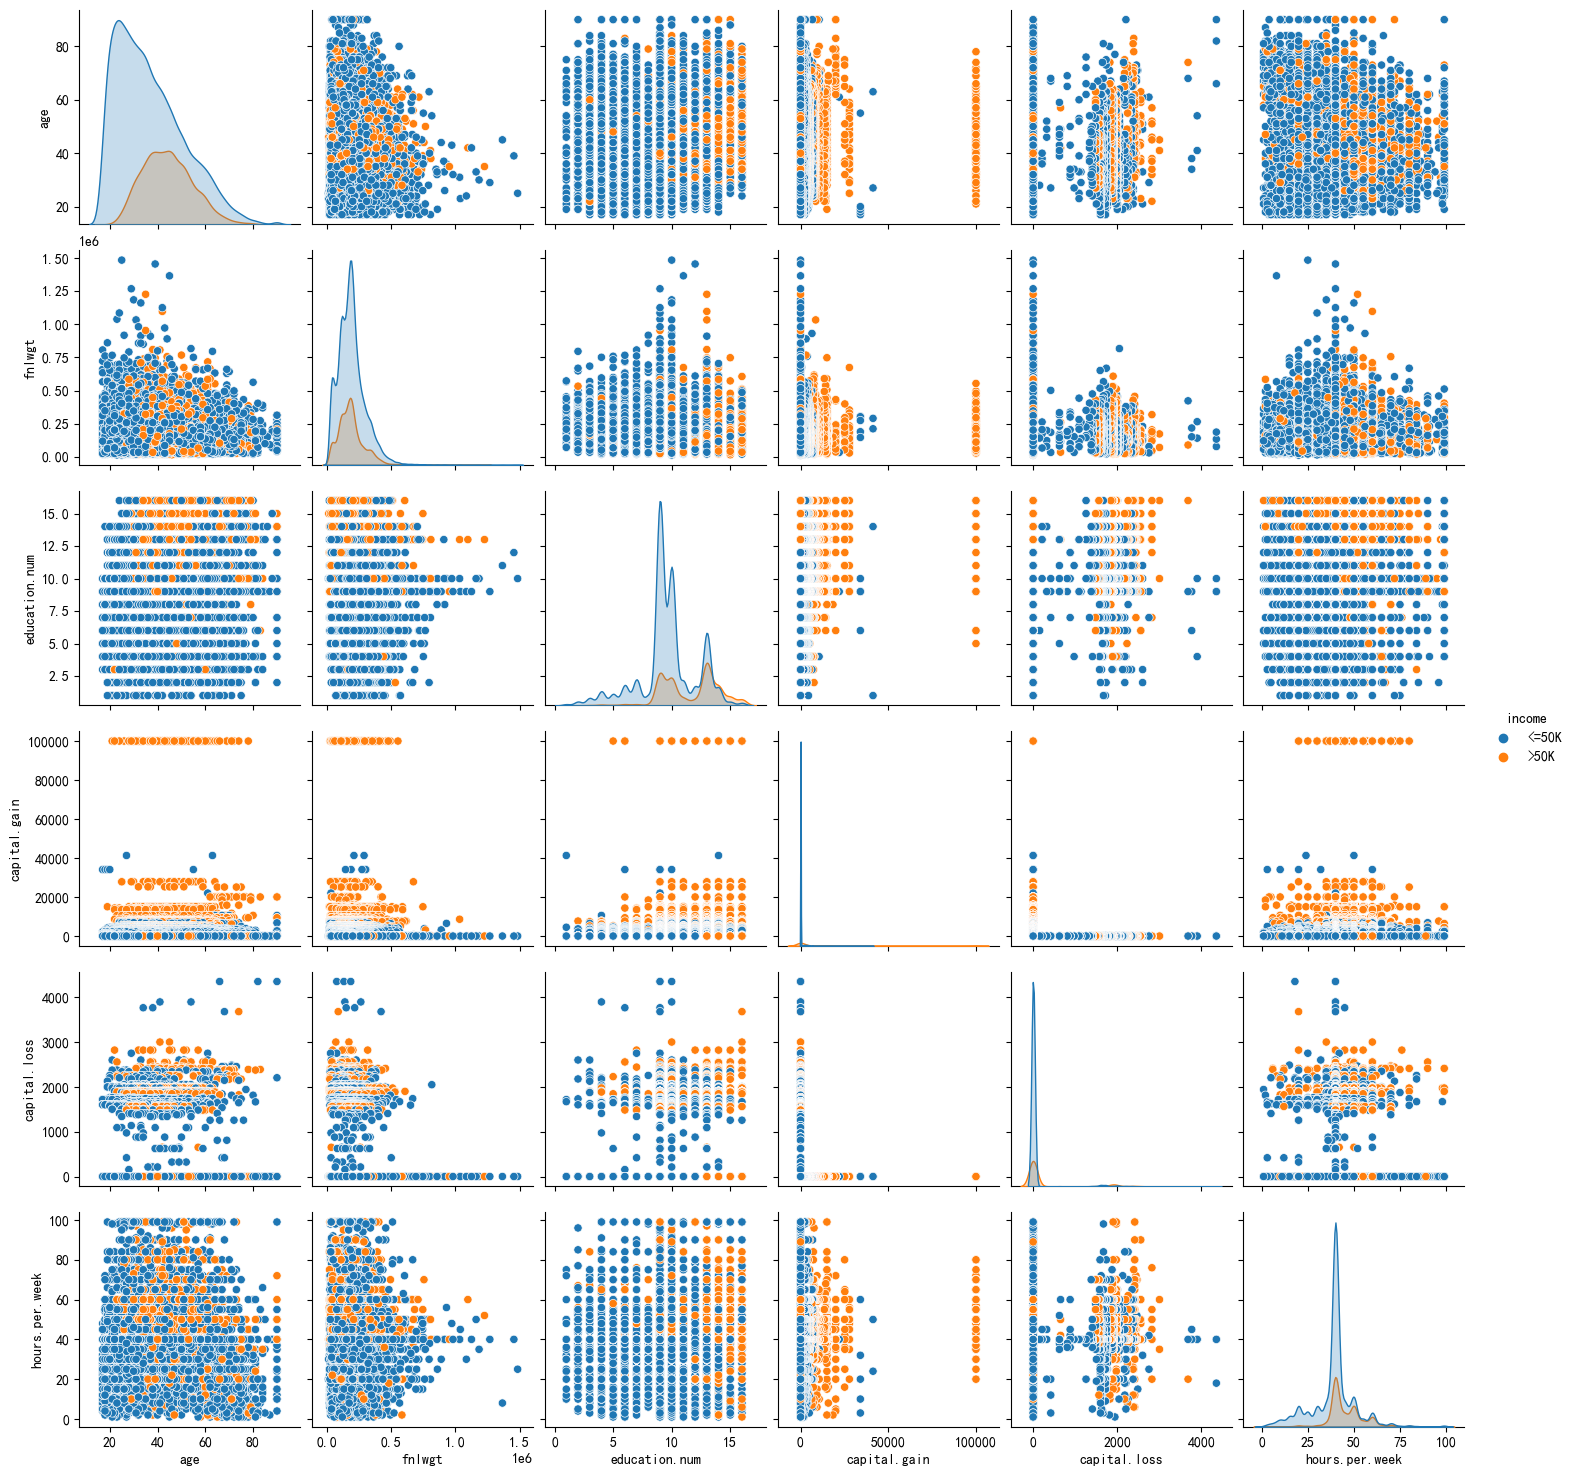

In [5]:
# 查看完整数据集的特征分布直方图
sns.pairplot(df,hue="income")

在接下income对自变量特征的描述性分析，我们对age，fnlwgt，education.num，hours.per.week四个自变量在年收入<=50K及>50K两类细部的查看。

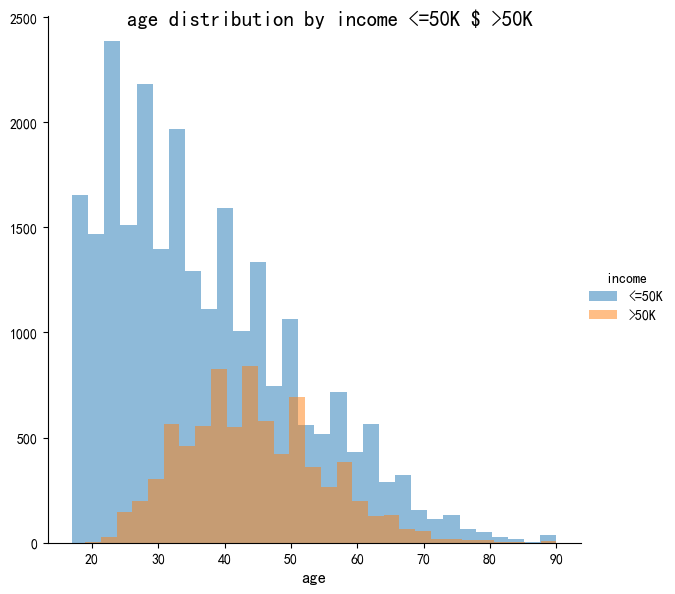

In [6]:
# 分别统计年收入<=50K及>50K的年龄分布情况
g = sns.FacetGrid(df, hue='income', height = 6)
g.map(plt.hist, 'age', alpha= 0.5, bins=30)
g.set_xlabels('age', fontsize=12)
# plt.subplots_adjust(top=0.8)
g.fig.suptitle('age distribution by income <=50K $ >50K', fontsize=15)
g.add_legend()

从<=50K年收入的年龄来看从高走低；>50K年收入从20到80，大致呈现钟形的右尾分布，可能是达到退休年纪而造成的低收入。

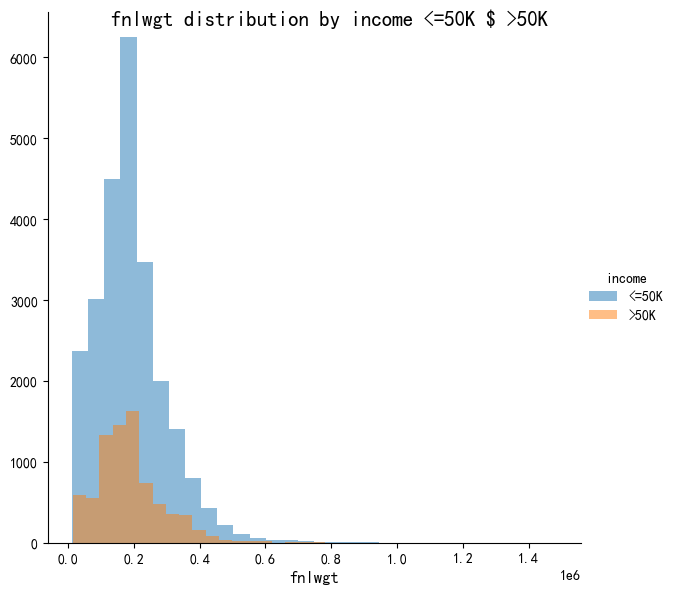

In [7]:
# 分别统计年收入<=50K及>50K的fnlwgt分布情况
g = sns.FacetGrid(df, hue='income', height = 6)
g.map(plt.hist, 'fnlwgt', alpha= 0.5, bins=30)
g.set_xlabels('fnlwgt', fontsize=12)
# plt.subplots_adjust(top=0.8)
g.fig.suptitle('fnlwgt distribution by income <=50K $ >50K', fontsize=15)
g.add_legend()

低收入与高收入在fnlwgt这个变量趋势一致。

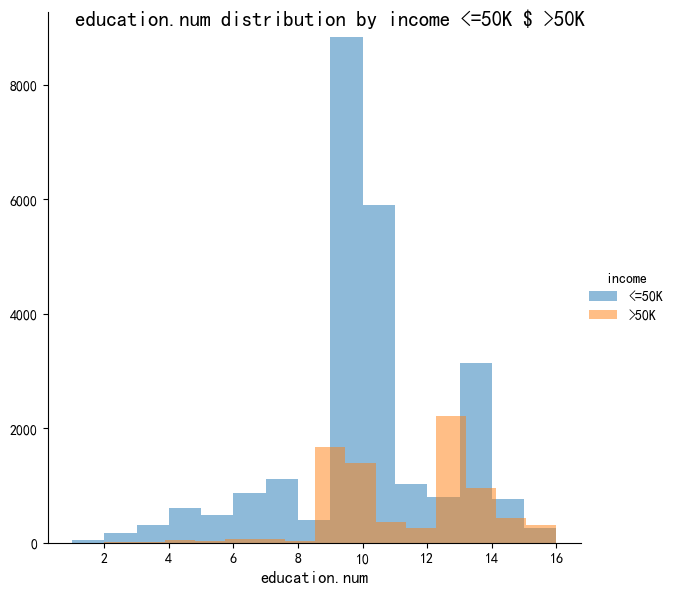

In [8]:
# 分别统计年收入<=50K及>50K的文凭数量分布情况
g = sns.FacetGrid(df, hue='income', height = 6)
g.map(plt.hist, 'education.num', alpha= 0.5, bins=15)
g.set_xlabels('education.num', fontsize=12)
# plt.subplots_adjust(top=0.8)
g.fig.suptitle('education.num distribution by income <=50K $ >50K', fontsize=15)
g.add_legend()

低收入与高收入在education.num变量分布大致一致，但可以观察到文凭数量在8个以下几乎没有高收入者，数量非常之少。

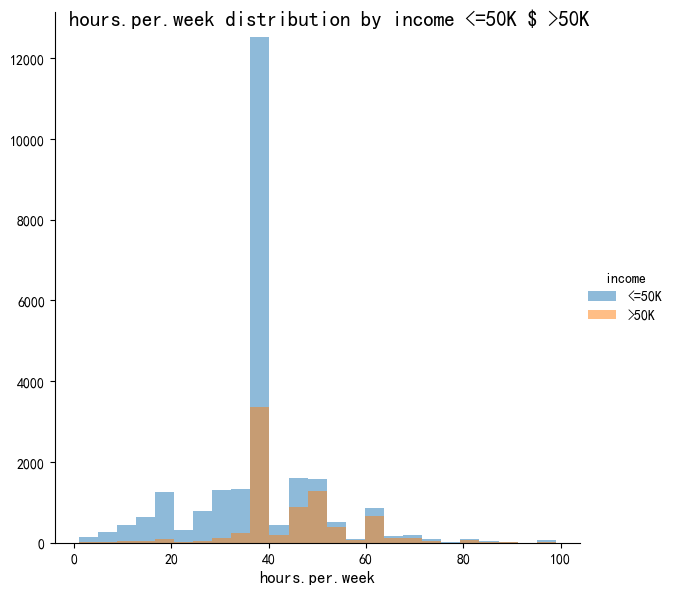

In [9]:
# 分别统计年收入<=50K及>50K的工时分布情况
g = sns.FacetGrid(df, hue='income', height = 6)
g.map(plt.hist, 'hours.per.week', alpha= 0.5, bins=25)
g.set_xlabels('hours.per.week', fontsize=12)
# plt.subplots_adjust(top=0.8)
g.fig.suptitle('hours.per.week distribution by income <=50K $ >50K', fontsize=15)
g.add_legend()

低收入与高收入在hours.per.week变量分布大致一致，但可以观察到每周工时在38小时以下几乎没有高收入者，数量非常之少。

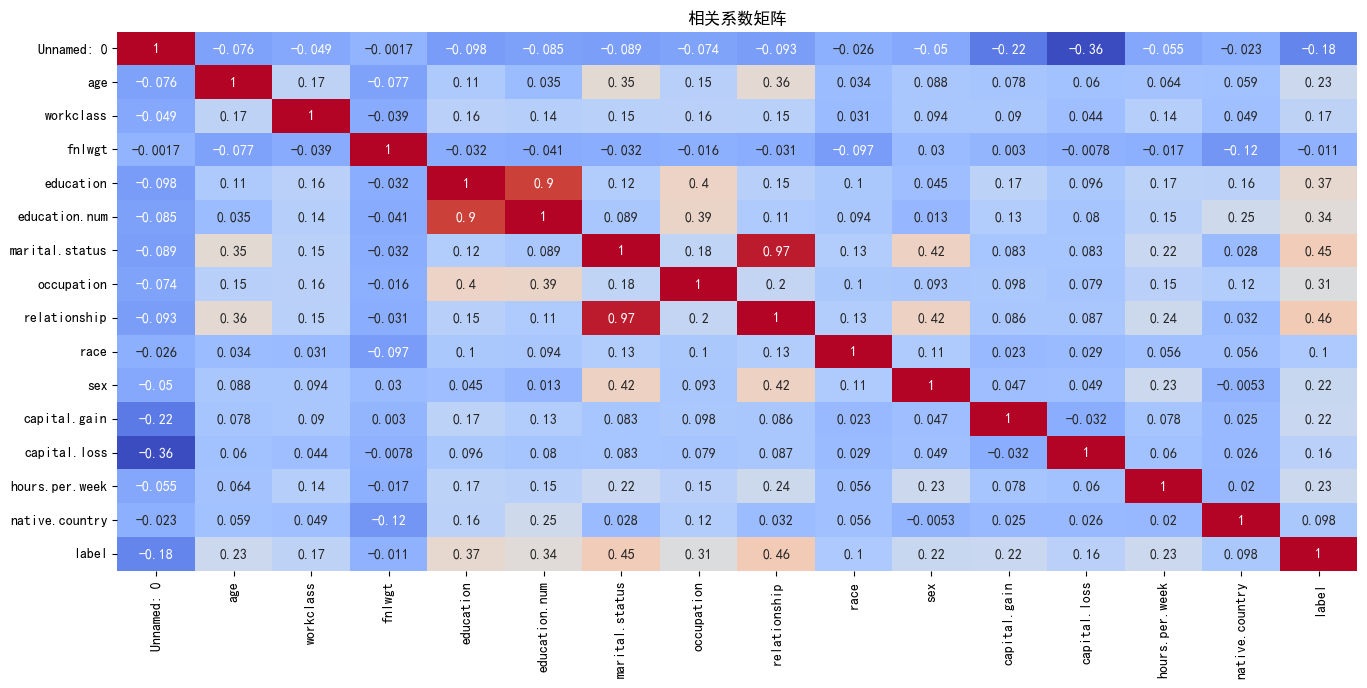

In [10]:
# 查看变量之间的相关系数矩阵
df_preposessing = pd.read_csv('train.csv')
plt.figure(figsize=(16,7))
sns.heatmap(cbar=False,annot=True,data=df_preposessing.corr(),cmap='coolwarm',)
plt.title('相关系数矩阵')
plt.show()

### 从预处理过后的变量相关系数矩阵解读：
自变量间education和education.num有着0.9的高度正相关，实属合理；marital.status和relationship有0.97的高度正相关也合理；自变量与应变量间，以marital.status和relationship与income有较高的正相关性，再者是education, education.num和occupation，在预测income时可以多关注这些变量。